In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Load the dataset into python environment

In [2]:
data = pd.read_csv('/content/titanic_dataset.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. Make ‘PassengerId’ as the index column

In [4]:
data.set_index('PassengerId',inplace=True)

In [5]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
data.shape

(891, 11)

3. Check the basic details of the dataset


In [7]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

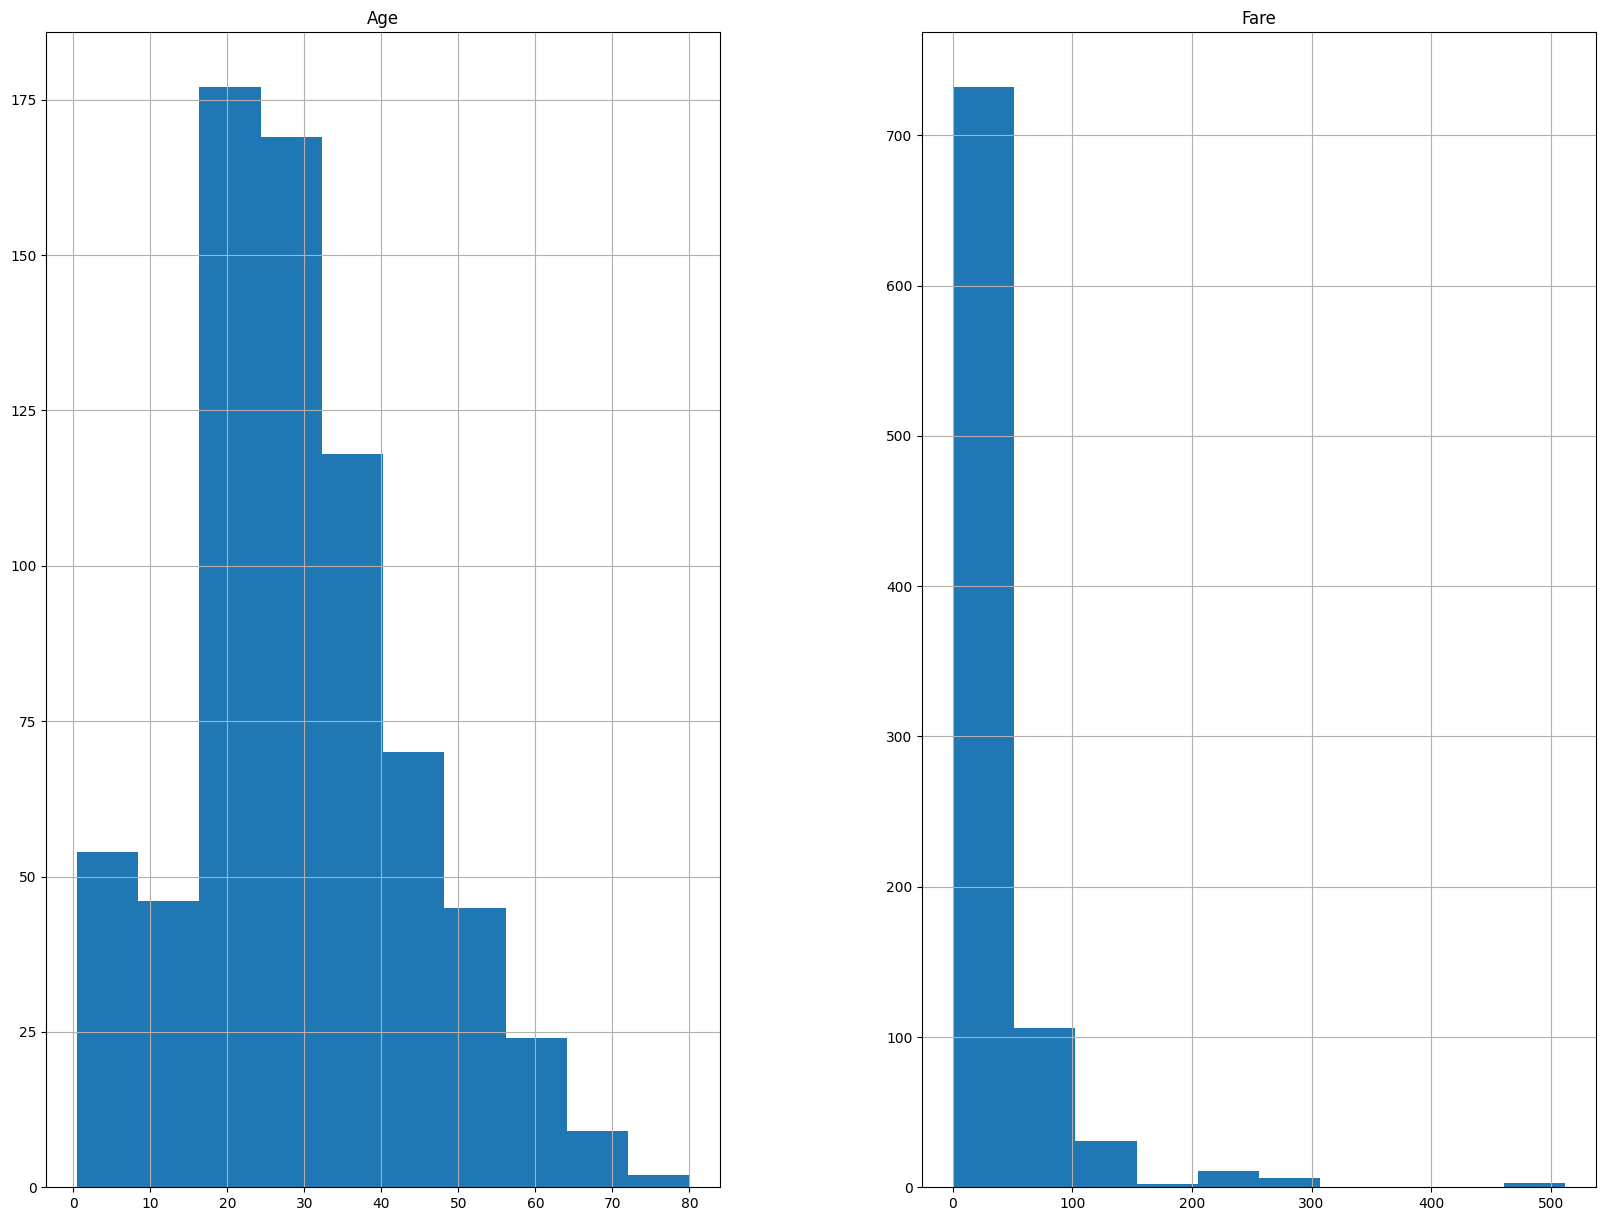

In [10]:
freqgraph = data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15))

4. Fill in all the missing values present in all the columns in the dataset

In [11]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [12]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset


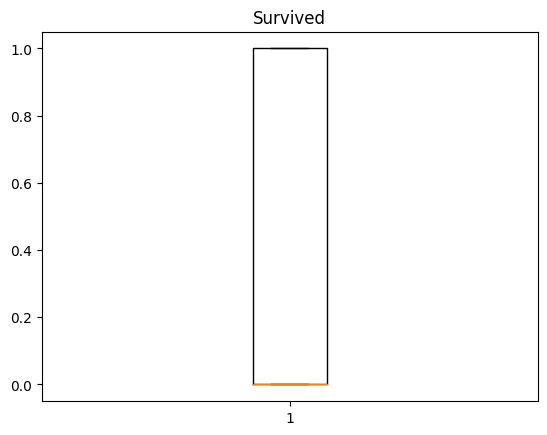

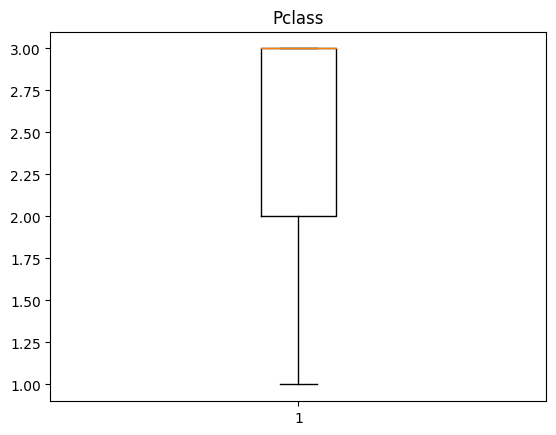

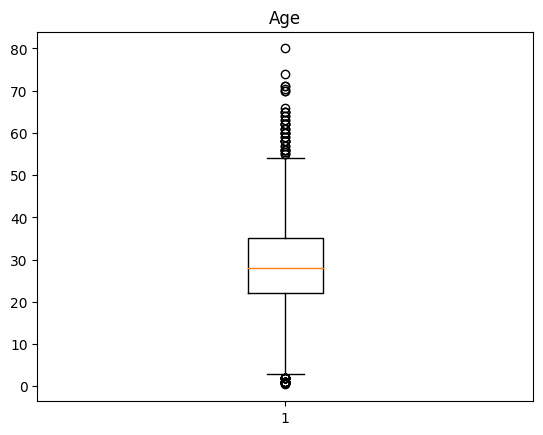

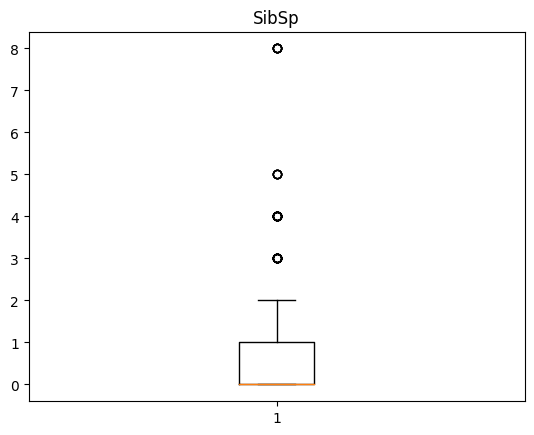

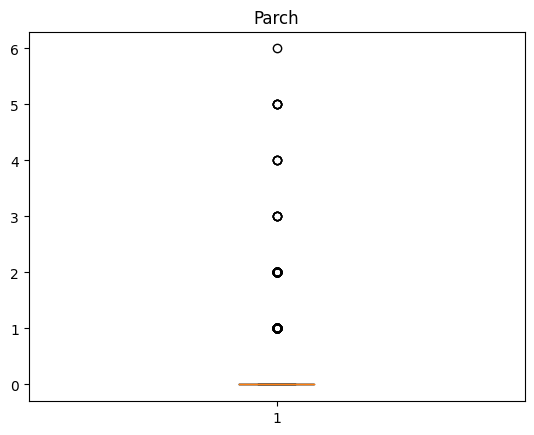

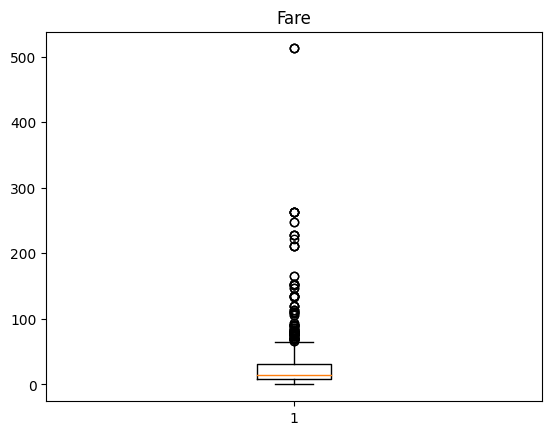

In [13]:
num_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

Removing Outliers  in SibSp column using Z score

In [14]:
from scipy.stats import zscore

In [15]:
z_scores = zscore(data['SibSp'])
print(z_scores)

PassengerId
1      0.432793
2      0.432793
3     -0.474545
4      0.432793
5     -0.474545
         ...   
887   -0.474545
888   -0.474545
889    0.432793
890   -0.474545
891   -0.474545
Name: SibSp, Length: 891, dtype: float64


In [16]:
threshold = 2
outliers_index = data.index[(z_scores > threshold) | (z_scores <- threshold)]
print(outliers_index)

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')


In [17]:
data1 = data.drop(outliers_index)
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [18]:
data1.shape

(845, 11)

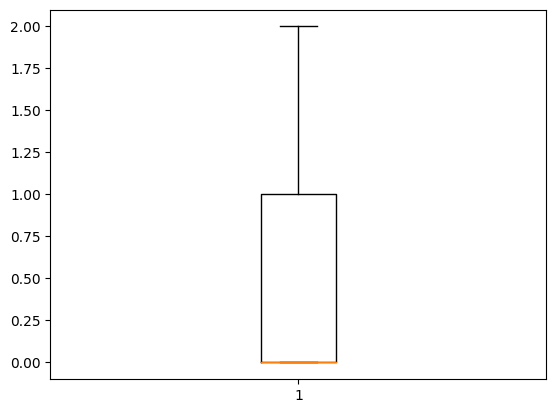

In [19]:
plt.boxplot(data1['SibSp'])
plt.show();

Removing Outliers from Fare column using IQR method

In [20]:
Q1 = np.percentile(data['Fare'],25,method='midpoint')
Q2 = np.percentile(data['Fare'],50,method='midpoint')
Q3 = np.percentile(data['Fare'],75,method='midpoint')

print('Q1 is :',Q1)
print('Q2 is :',Q2)
print('Q3 is :',Q3)

Q1 is : 7.9104
Q2 is : 14.4542
Q3 is : 31.0


In [21]:
IQR = Q3-Q1
print(IQR)

23.0896


In [22]:
low_lim =Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('Lower Fare',low_lim)

print('Upper Fare',up_lim)

Lower Fare -26.724
Upper Fare 65.6344


In [23]:
outliers=[]
for x in data['Fare']:
  if ((x<low_lim) or (x>up_lim)):
    outliers.append(x)

print(outliers)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [24]:
data['Fare'] = data['Fare'].clip(lower=low_lim,upper=up_lim)

In [25]:
outliers=[]
for x in data['Fare']:
  if ((x<low_lim) or (x>up_lim)):
    outliers.append(x)

print(outliers)

[]


Removing Outliers from SibSp column using IQR method

In [26]:
Q1 = np.percentile(data['SibSp'],25,method='midpoint')
Q2 = np.percentile(data['SibSp'],50,method='midpoint')
Q3 = np.percentile(data['SibSp'],75,method='midpoint')

print('Q1 is :',Q1)
print('Q2 is :',Q2)
print('Q3 is :',Q3)

Q1 is : 0.0
Q2 is : 0.0
Q3 is : 1.0


In [27]:
IQR = Q3-Q1
print(IQR)

1.0


In [28]:
low_lim =Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('Lower Fare',low_lim)

print('Upper Fare',up_lim)

Lower Fare -1.5
Upper Fare 2.5


In [29]:
outliers=[]
for x in data['SibSp']:
  if ((x<low_lim) or (x>up_lim)):
    outliers.append(x)

print(outliers)

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [30]:
data['SibSp'] = data['SibSp'].clip(lower=low_lim,upper=up_lim)

In [31]:
outliers=[]
for x in data['SibSp']:
  if ((x<low_lim) or (x>up_lim)):
    outliers.append(x)

print(outliers)

[]


Age

In [32]:
Q1 = np.percentile(data['Age'],25,method='midpoint')
Q2 = np.percentile(data['Age'],50,method='midpoint')
Q3 = np.percentile(data['Age'],75,method='midpoint')

print('Q1 is :',Q1)
print('Q2 is :',Q2)
print('Q3 is :',Q3)

Q1 is : 22.0
Q2 is : 28.0
Q3 is : 35.0


In [33]:
IQR = Q3-Q1
print(IQR)

13.0


In [34]:
low_lim =Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('Lower Fare',low_lim)

print('Upper Fare',up_lim)

Lower Fare 2.5
Upper Fare 54.5


In [35]:
outliers=[]
for x in data['Age']:
  if ((x<low_lim) or (x>up_lim)):
    outliers.append(x)

print(outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [36]:
data['Age'] = data['Age'].clip(lower=low_lim,upper=up_lim)

In [37]:
outliers=[]
for x in data['Age']:
  if ((x<low_lim) or (x>up_lim)):
    outliers.append(x)

print(outliers)

[]


6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [38]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.039282,0.426487,0.381594,24.046813
std,0.486592,0.836071,12.072074,0.708246,0.806057,20.481625
min,0.000000,1.000000,2.500000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,54.500000,2.500000,6.000000,65.634400


In [39]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1.0,2,W./C. 6607,23.4500,B96 B98,S


In [47]:
X = data.drop(['Survived','Pclass','SibSp','Parch',"Name",'Ticket','Cabin','Embarked','Sex'],axis=1)

In [48]:
X

,Age,Fare
PassengerId,,
1,22.0,7.2500
2,38.0,65.6344
3,26.0,7.9250
4,35.0,53.1000
5,35.0,8.0500
...,...,...
887,27.0,13.0000
888,19.0,30.0000
889,28.0,23.4500


In [49]:
X.describe()

,Age,Fare
count,891.000000,891.000000
mean,29.039282,24.046813
std,12.072074,20.481625
min,2.500000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,54.500000,65.634400


In [52]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_mn = minmax.fit_transform(X)
X_mn = pd.DataFrame(X_mn)


In [53]:
X_mn.describe()

,0,1
count,891.000000,891.000000
mean,0.510371,0.366375
std,0.232155,0.312056
min,0.000000,0.000000
25%,0.375000,0.120522
50%,0.490385,0.220223
75%,0.625000,0.472313
max,1.000000,1.000000


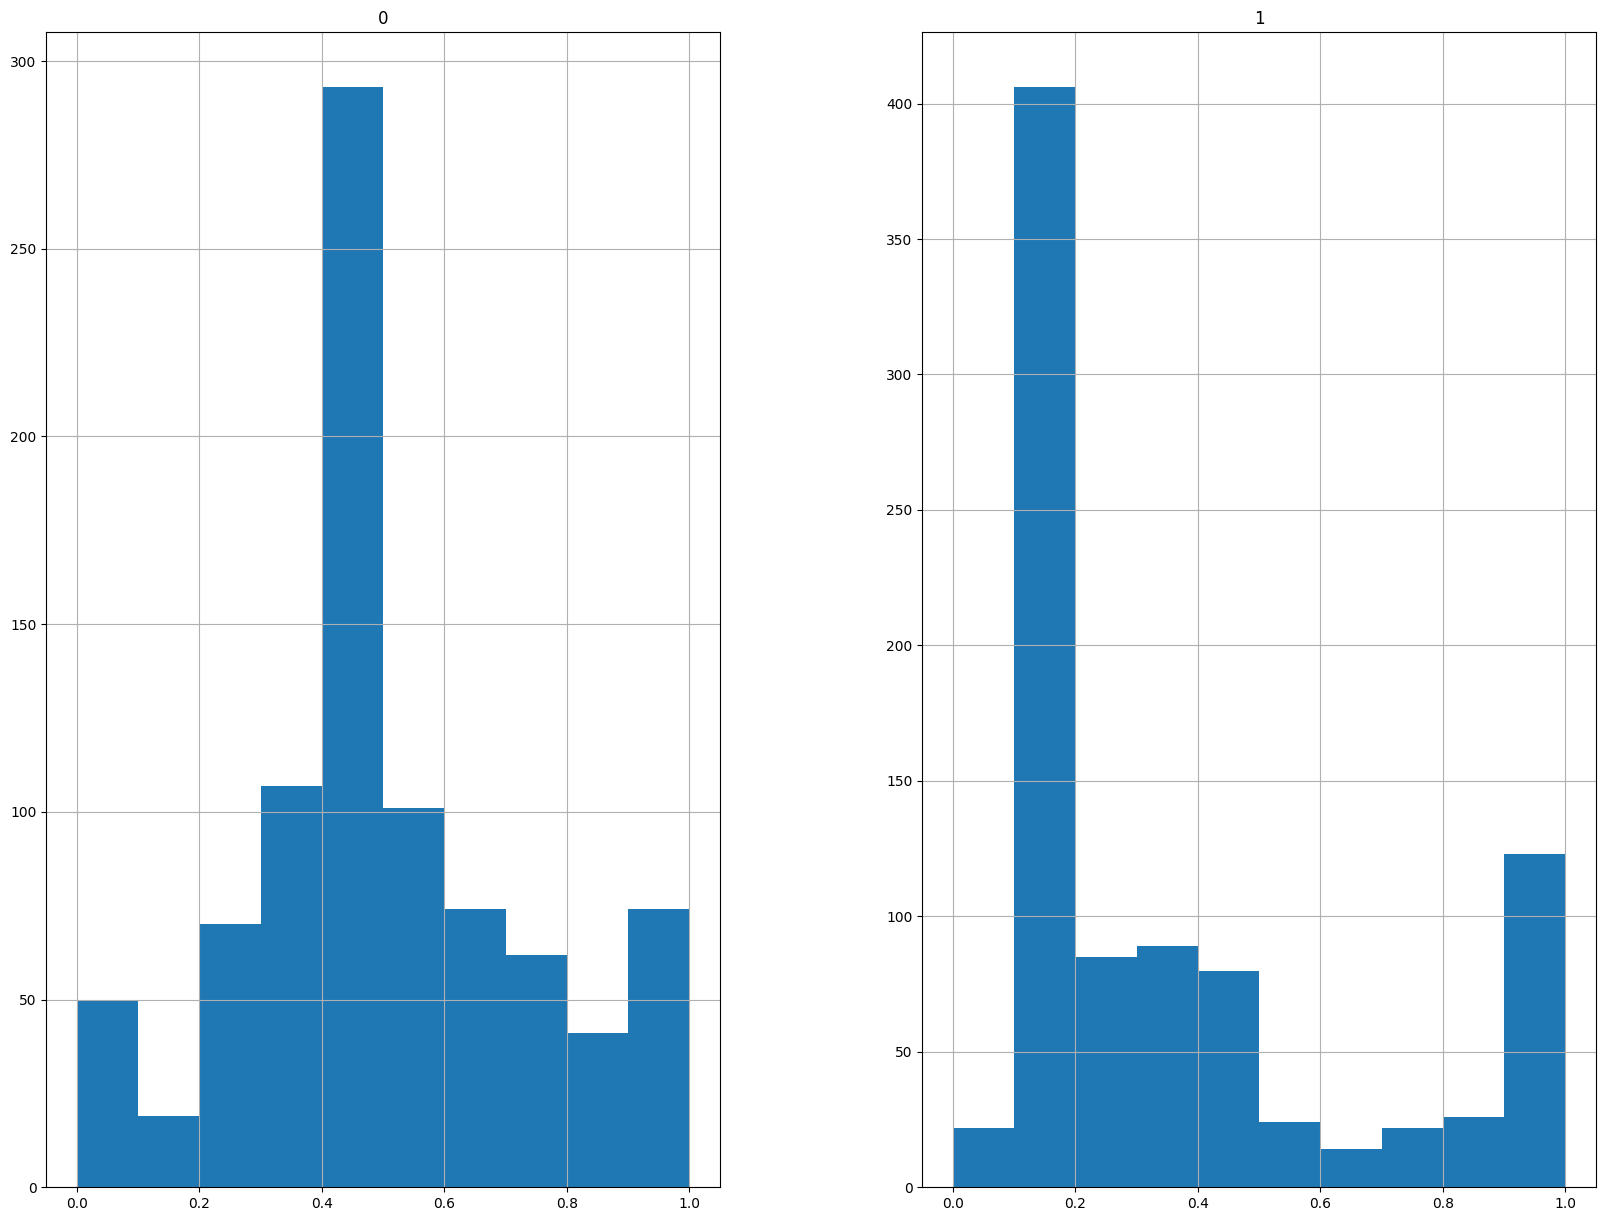

In [54]:
X_mn.hist(figsize=(20,15))
plt.show()